In this notebook we will get started using lightSOM.

Let install lightSOM:

In [78]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
#!pip install lightSOM
!pip uninstall lightSOM -y

For this example we will load the <a href="https://archive.ics.uci.edu/ml/datasets/seeds">seeds</a> dataset dataset using pandas:

In [80]:
import pandas as pd
import numpy as np
columns=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=columns, 
                   sep='\t+', engine='python')
target = data['target'].values
label_names = {1:'Kama', 2:'Rosa', 3:'Canadian'}
data = data[data.columns[:-1]]


data_vals = data.values

In [81]:
data.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coefficient,length_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [82]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

We can initialize and train MiniSom as follows:
train function has few important options:
**start_learning_rate**: is the initial value of the learning rate, default value is 0.1
**epochs**: the number of iterations of the algorithm.
**keep_error_history**: allow to save the history of the various model quality measures. default value is *False*. setting this option to *True* will slow the training 

In [83]:
import sys, os, errno
import numpy as np

sys.path.append('../..')

from lightSOM import SOM
path='./output/basic'

if path != './output/basic':
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

columns=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove']
net=SOM().create(25, 25, data_vals, feature_names=columns, target=target, pbc=True)

net.train(0.1, 10000, random_order=False, keep_error_history=True)


Periodic Boundary Conditions active.
The weights will be initialised randomly.
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.2600420392160669

 topological error: 0.2
Training SOM... done!


### Model quality

SOM Model quality is measured by the quantization error, which measure the similarity of the prototypes learnend by the SOM and the real data.
While topological error measures the proportion of all data for which the first and second BMU are not adjacent.
Seeting the **keep_error_history** to *True* allow us to plot the evolution of these meaures.


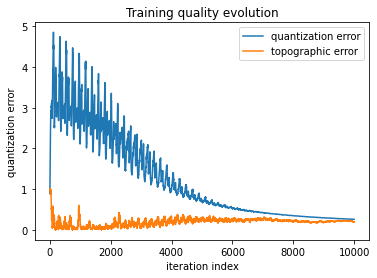

In [84]:
from lightSOM.visualization.som_view import SOMView
vhts  = SOMView(net, 10,10, text_size=10)
vhts.plot_training_errors()



/Users/mohamedmentis/Dropbox/My Mac (MacBook-Pro.local)/Documents/Mentis/Development/lightSOM/lightSOM/examples/../../lightSOM/visualization/hexagons.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  cbar.ax.tick_params(labelsize=20/np.log2(len(titles)))


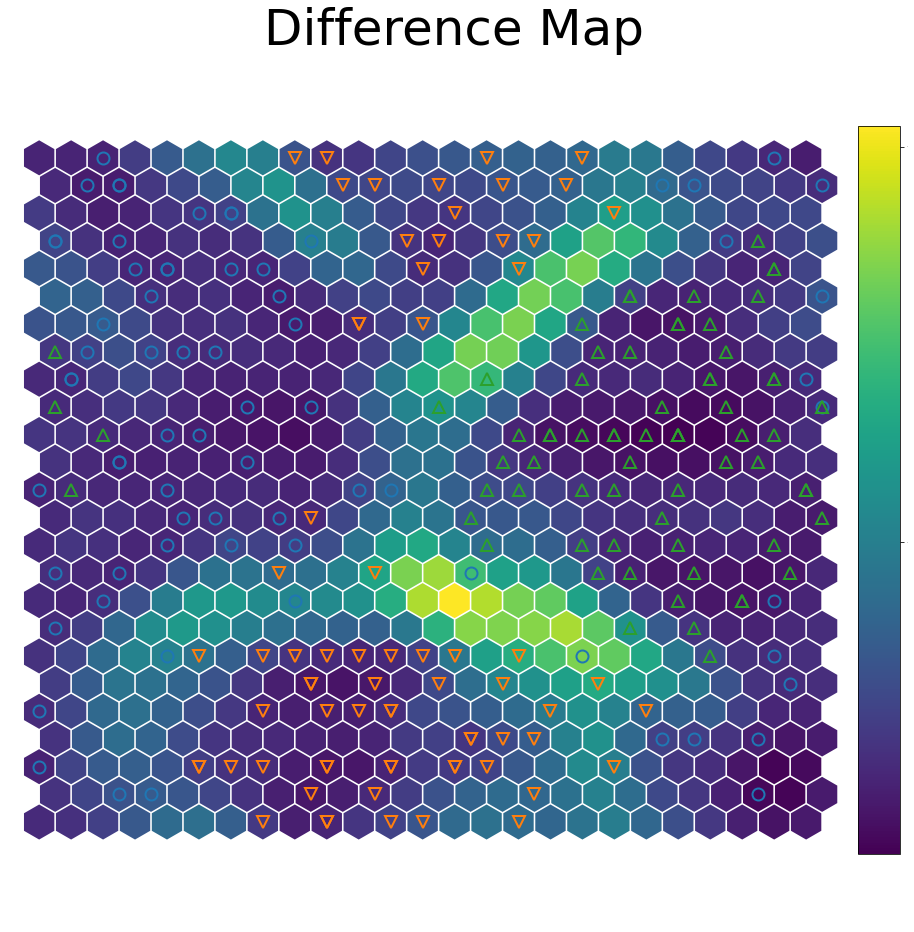

In [85]:
vhts.plot_diffs(denormalize=True, annotate_target=True)

## Results visualization
There are various ways to visualize the result of the training:
### Difference Maps
We can plot the distance map (U-Matrix) using a pseudocolor where the neurons of the maps are displayed as cells (The default neighberhood scheme is hexagonal). The color represents the distance from the neighbour neurons in term of weight.

In lightSOM, there is a visualization object called SOMView that handles all the visualtisations.



On top of the pseudo color we can add markers that repesent the samples target class mapped in the specific cells. This can be turned on and off by using **annotate_target=True** option of the *plot_diff* function

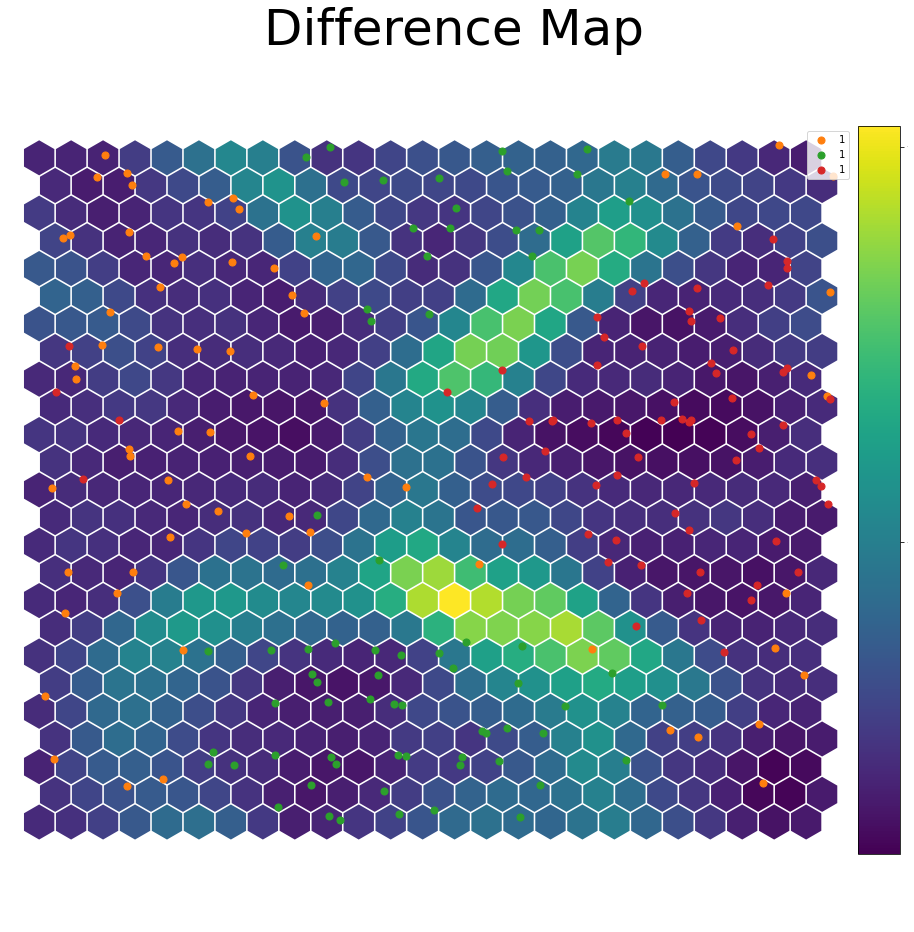

In [86]:
vhts.plot_diffs(denormalize=True, annotate_samples=True)

This view allows to have an overview of how the samples are distributed across the map.
Each dot represents the coordinates of the winning neuron for each sample. A random offset is added to avoid overlaps between points within the same cell.

### Map view



### Activation frequency
To have an idea of which neurons of the map are activated more often we will use frequecy plots.
This plot reflects the activation frequencies of each neurons.

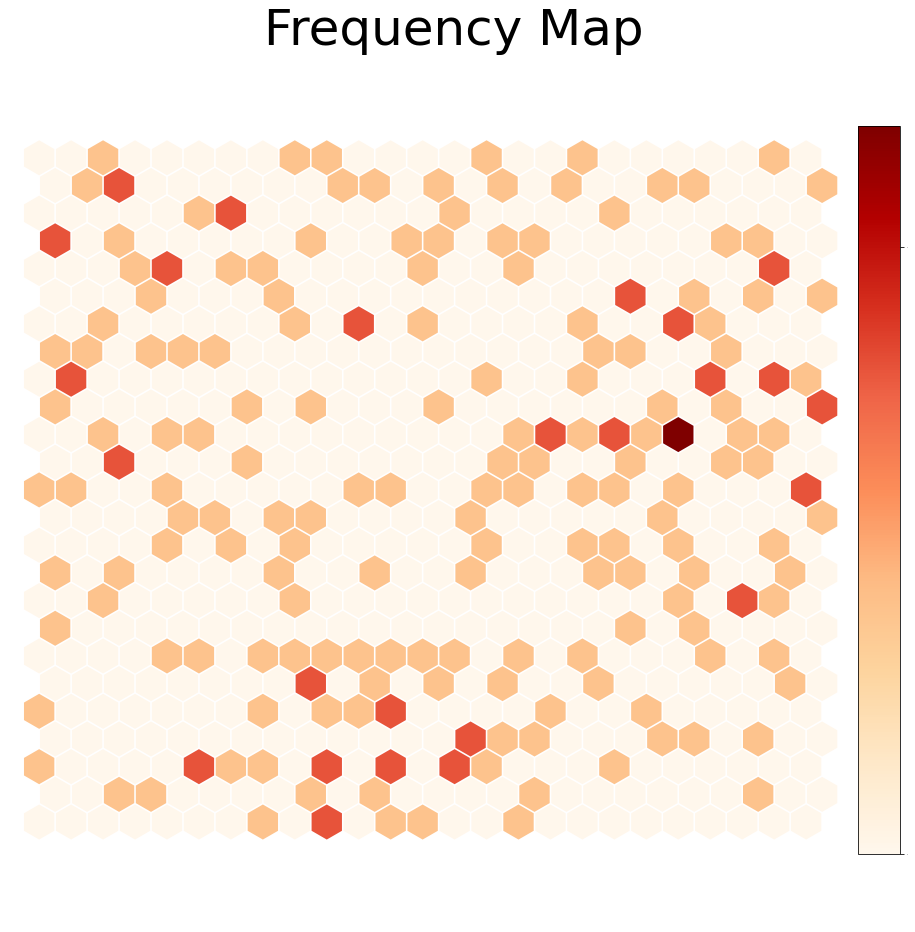

In [87]:
vhts.plot_frequencies()

### Hit Maps

Hit maps are equivalent to Frequency maps

<AxesSubplot:title={'center':'Feature_length_kernel_groove'}>

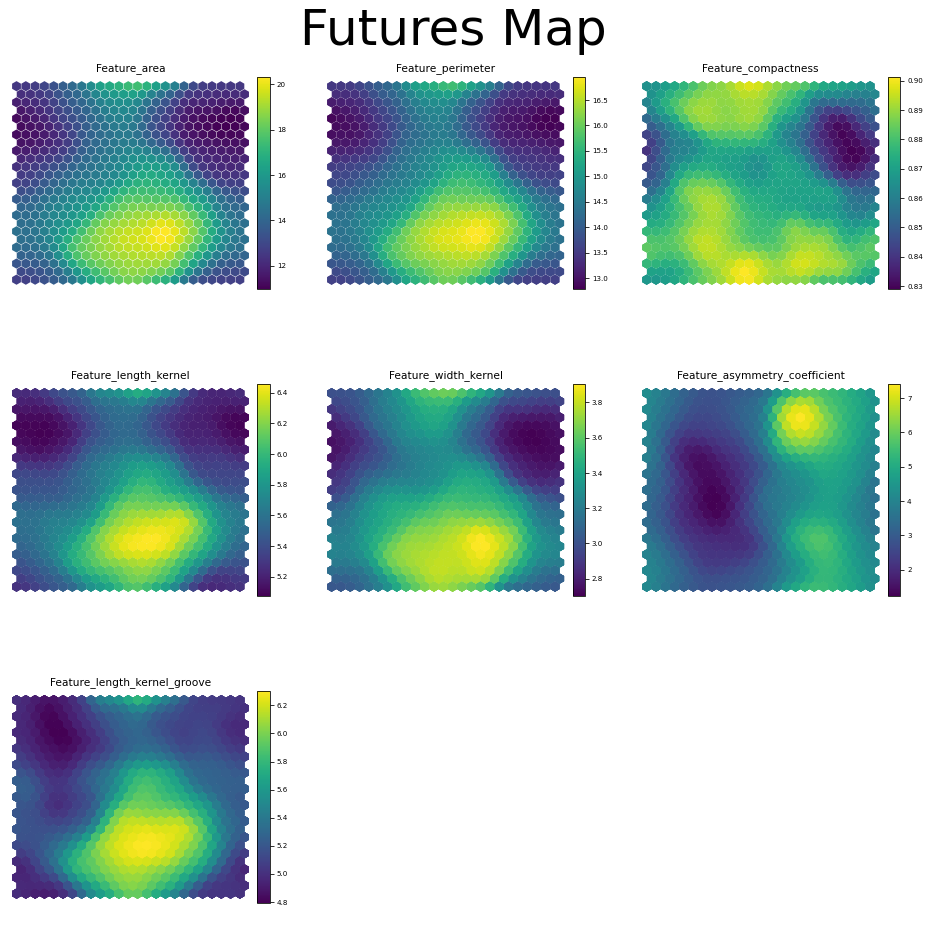

In [62]:
vhts.plot_nodes_maps(which_dim="all", col_size=3)

When dealing with a supervised problem, one can visualize the proportion of samples per class falling in a specific neuron using a pie chart per neuron:

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

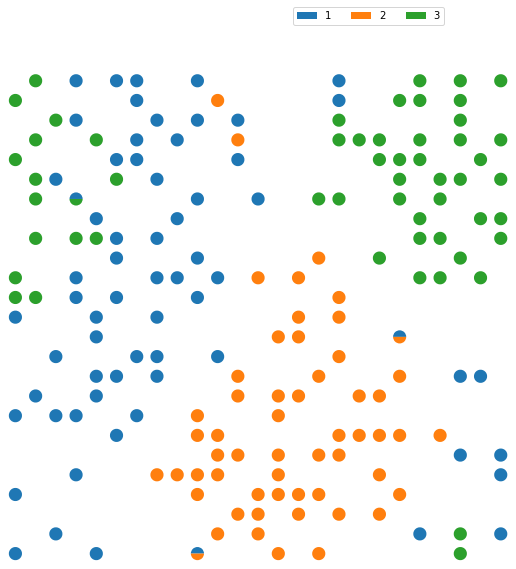

In [66]:
vhts.plot_label_proportions()

To understand how the training evolves we can plot the quantization and topographic error of the SOM at each step. This is particularly important when estimating the number of iterations to run:

### Clutering


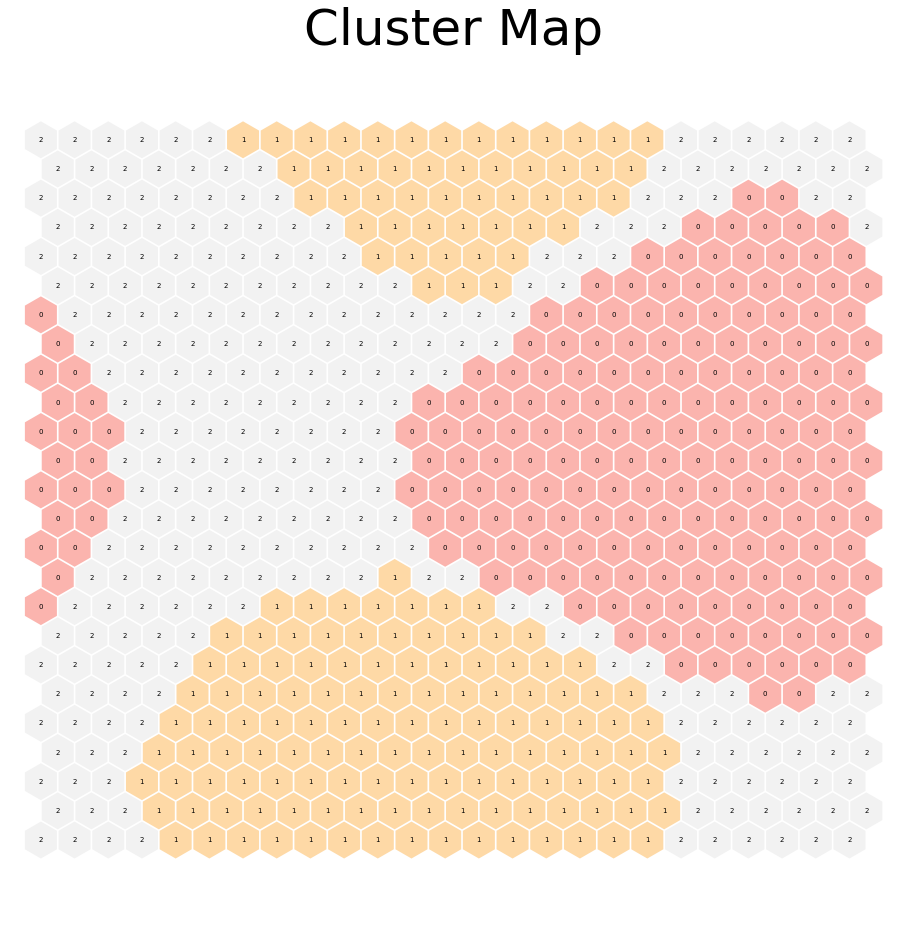

In [92]:
vhts.plot_cluster_map(n_clusters=3, anotate=True)